# Simple STDP

A simple model showing the STDP learning on a single neuron.

Model adapted from Song, Miller and Abbott (2000) and Song and Abbott (2001)

Code adapted from the Brian example: http://brian.readthedocs.org/en/1.4.1/examples-plasticity_STDP1.html

ANNarchy 4.6 (4.6.0b) on linux (posix). 
Start the simulation
Simulating 100.0 seconds of the network took 2.029237985610962 seconds. 
Mean firing rate in the input population: 15.00412
Mean firing rate of the output neuron: 26.9


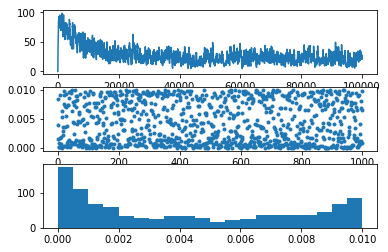

In [1]:
from ANNarchy import *

# Parameters
F = 15.0 # Poisson distribution at 15 Hz
N = 1000 # 1000 Poisson inputs
gmax = 0.01 # Maximum weight
duration = 100000.0 # Simulation for 100 seconds

# Definition of the neuron
IF = Neuron(
    parameters = """
        tau_m = 10.0
        tau_e = 5.0 
        vt = -54.0 
        vr = -60.0 
        El = -74.0 
        Ee = 0.0 
    """,
    equations = """
        tau_m * dv/dt = El - v + g_exc * (Ee - vr) : init = -60.0
        tau_e * dg_exc/dt = - g_exc
    """,
    spike = """
        v > vt
    """,
    reset = """
        v = vr
    """
)

# Input population
Input = PoissonPopulation(name = 'Input', geometry=N, rates=F)

# Output neuron
Output = Population(name = 'Output', geometry=1, neuron=IF)

# Projection learned using STDP
proj = Projection( 
    pre = Input, 
    post = Output, 
    target = 'exc',
    synapse = STDP(tau_plus=20.0, tau_minus=20.0, A_plus=0.01, A_minus=0.0105, w_max=0.01)
)
proj.connect_all_to_all(weights=Uniform(0.0, gmax))


# Compile the network
compile()

# Start recording
Mi = Monitor(Input, 'spike') 
Mo = Monitor(Output, 'spike')

# Start the simulation
print('Start the simulation')
simulate(duration, measure_time=True)

# Retrieve the recordings
input_spikes = Mi.get('spike')
output_spikes = Mo.get('spike')

# Compute the mean firing rates during the simulation
print('Mean firing rate in the input population: ' + str(Mi.mean_fr(input_spikes)) )
print('Mean firing rate of the output neuron: ' + str(Mo.mean_fr(output_spikes)) )

# Compute the instantaneous firing rate of the output neuron
output_rate = Mo.smoothed_rate(output_spikes, 100.0)

# Receptive field after simulation
weights = proj.w[0]

import matplotlib.pyplot as plt
plt.subplot(3,1,1)
plt.plot(output_rate[0, :])
plt.subplot(3,1,2)
plt.plot(weights, '.')
plt.subplot(3,1,3)
plt.hist(weights, bins=20)
plt.show()